<a href="https://colab.research.google.com/github/dlclxkzk87/AIFFEL_Quest/blob/main/MainQuest/Main_Quest03/AI_rock_scissor_paper_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.14.0
1.23.5


In [2]:
# 데이터 불러오기 + Resize 하기
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1367  images to be resized.


<ipython-input-3-7dfbe6f4a3d4>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1367  images resized.
가위 이미지 resize 완료!


In [4]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1198  images to be resized.


<ipython-input-3-7dfbe6f4a3d4>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1198  images resized.
바위 이미지 resize 완료!


In [5]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1091  images to be resized.


<ipython-input-3-7dfbe6f4a3d4>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1091  images resized.
보 이미지 resize 완료!


In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=3656):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper"
x_train, y_train =load_data(image_dir_path)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2023)
x_train_norm, x_val_norm = x_train/255.0, x_val /255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3656 입니다.
x_train shape: (2924, 28, 28, 3)
y_train shape: (2924,)


라벨:  0


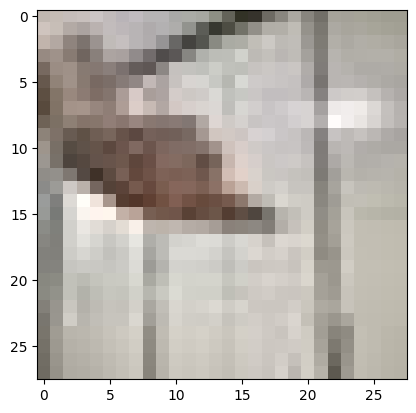

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요.
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (No

## 딥러닝 네트워크 학습시키기

In [9]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# 입력이미지의 크기에 채널 추가
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_norm, y_train, epochs=10, validation_data=(x_val_norm, y_val))

Before Reshape - x_train_norm shape: (2924, 28, 28, 3)
Epoch 1/10
92/92 [==============================] - 10s 88ms/step - loss: 0.7575 - accuracy: 0.6536 - val_loss: 0.4770 - val_accuracy: 0.7937
Epoch 2/10
92/92 [==============================] - 7s 76ms/step - loss: 0.3337 - accuracy: 0.8618 - val_loss: 0.2165 - val_accuracy: 0.9126
Epoch 3/10
92/92 [==============================] - 8s 89ms/step - loss: 0.1522 - accuracy: 0.9460 - val_loss: 0.1130 - val_accuracy: 0.9672
Epoch 4/10
92/92 [==============================] - 6s 67ms/step - loss: 0.0782 - accuracy: 0.9829 - val_loss: 0.0605 - val_accuracy: 0.9836
Epoch 5/10
92/92 [==============================] - 7s 71ms/step - loss: 0.0429 - accuracy: 0.9942 - val_loss: 0.0416 - val_accuracy: 0.9945
Epoch 6/10
92/92 [==============================] - 9s 93ms/step - loss: 0.0225 - accuracy: 0.9979 - val_loss: 0.0305 - val_accuracy: 0.9932
Epoch 7/10
92/92 [==============================] - 4s 46ms/step - loss: 0.0104 - accuracy: 0.9997

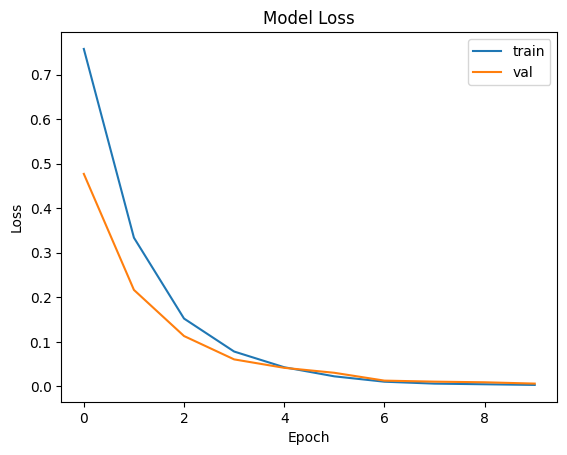

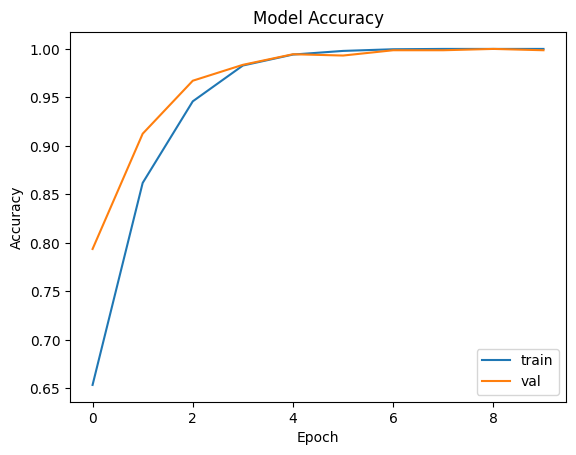

In [10]:
# 훈련 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 훈련 정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

## 얼마나 잘 만들었는지 확인하기(테스트)

In [11]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# scissor
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

# rock
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/test/rock"
resize_images(image_dir_path)

# paper
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/test/paper"
resize_images(image_dir_path)

# 우선 테스트용 데이터인 x_test, y_test를 만들어 봅시다.
image_dir_path = "/content/drive/MyDrive/on6Core/Quest_python/project_rock_scissor_paper/test"
x_test, y_test = load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.


<ipython-input-3-7dfbe6f4a3d4>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (3656, 28, 28, 3)
y_test shape: (3656,)


In [12]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm ,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print("테스트 정확도: {:.4f}".format(test_accuracy))

115/115 - 3s - loss: 0.9880 - accuracy: 0.9576 - 3s/epoch - 24ms/step
test_loss: 0.9880053997039795
테스트 정확도: 0.9576


In [13]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

115/115 [==============================] - 2s 12ms/step
model.predict() 결과 :  [1.5833716e-01 2.2406972e-04 8.4143877e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


# 회고  
   
테스트 정확도가 학습 때와 달리 30 ~ 35%가 나오는 문제가 있어 해결하고자
1. 다른 크루의 데이터를 가지고 테스트   
2. 모델 학습에서 하이퍼파라미터 값 조정      

하지만 결과적으로 정확도를 높일 수 없었던 것에 대해 분석을 하자면
아무래도 학습 데이터의 수가 부족하여 과적합이 발생된 것으로 생각된다.   
   
MNSIT 테스트시 훈련 데이터가 60000개고 테스트 데이터가 10000개였고 정확도가 99%까지 올라간 걸 감안했을 때 샘플 데이터가 많을수록 정확도가 높아진다는 것 그리고 하이퍼파라미터 조정도 어느정도의 샘플이 확보되어어야 의미가 있어진다는 것을 알게 되었다.
